##project 1. this is a new change

In [1]:
def matDesign (dataSet,order,indVariables):
    '''This is a function to set up the design matrix
    the inputs are :dataSet, the n datapoints, x and y data in a nx2 matrix
                    order, is the order of the coefficients, 
                    indVariables, the number of independant variables or predictors
                    
    i.e if order = 3 and indVariables = 1, then the number of coefficients THIS function will create is 4. (1 x x**2 x**3)
    or  if order = 2 and indVariables = 2, then the number of coefficients THIS function will create is 6. (1 x y xy x**2 y**2) 
    
    IMPORTANT NOTE: this works only for indVariables = 2 at the moment
    
    the outputs are X
    '''

    # if statement for the case with one independant variable
    if indVariables == 1:
        coefficients = int(order + 1)
        
        # set up the Design matrix
        n = np.int(np.size(dataSet))
        matX = np.zeros((n,coefficients))
    
        # loop through all the other columns as powes of dataSet
        i = 0 #counter
        while i < coefficients:
            matX[:,i] = (dataSet[i])**i
            i=i+1
        
        
    ###########################################################################################################
    
    # if statement for the case with two independant variables
    
    if (indVariables == 2):
        coefficients = int((order + 1)*(order + 2)/2)
        
    # set up the Design matrix
        #find the number of rows in dataSet
        rows,columns = np.hsplit(dataSet,2) # this is a messy way to find n 
        n = np.int(np.size(rows))
        
        matX = np.zeros((n,coefficients))
        #print(matX)
        
        # loop through all the other columns as powes of xDataset
        # THIS IS NOT FINISHED AS THERE IS NO LOOP
        matX[:,0] = 1
        matX[:,1] = dataSet[:,0]
        matX[:,2] = dataSet[:,1]
        matX[:,3] = (dataSet[:,0])*(dataSet[:,1])
        matX[:,4] = (dataSet[:,0])**2
        matX[:,5] = (dataSet[:,1])**2
        

    return matX

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from numpy.random import rand, randn, seed

fig = plt.figure()
ax = fig.gca(projection='3d')
# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

z = FrankeFunction(x, y)
# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


<Figure size 640x480 with 2 Axes>

In [3]:
## THis is a test for 2 independant variables
# put the x and y data into one matrix nx2 matrix
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
print (np.shape(x))
dataSet = np.transpose(np.vstack((x,y)))

matX = matDesign(dataSet,2,2)
print(matX)

(20,)
[[1.     0.     0.     0.     0.     0.    ]
 [1.     0.05   0.05   0.0025 0.0025 0.0025]
 [1.     0.1    0.1    0.01   0.01   0.01  ]
 [1.     0.15   0.15   0.0225 0.0225 0.0225]
 [1.     0.2    0.2    0.04   0.04   0.04  ]
 [1.     0.25   0.25   0.0625 0.0625 0.0625]
 [1.     0.3    0.3    0.09   0.09   0.09  ]
 [1.     0.35   0.35   0.1225 0.1225 0.1225]
 [1.     0.4    0.4    0.16   0.16   0.16  ]
 [1.     0.45   0.45   0.2025 0.2025 0.2025]
 [1.     0.5    0.5    0.25   0.25   0.25  ]
 [1.     0.55   0.55   0.3025 0.3025 0.3025]
 [1.     0.6    0.6    0.36   0.36   0.36  ]
 [1.     0.65   0.65   0.4225 0.4225 0.4225]
 [1.     0.7    0.7    0.49   0.49   0.49  ]
 [1.     0.75   0.75   0.5625 0.5625 0.5625]
 [1.     0.8    0.8    0.64   0.64   0.64  ]
 [1.     0.85   0.85   0.7225 0.7225 0.7225]
 [1.     0.9    0.9    0.81   0.81   0.81  ]
 [1.     0.95   0.95   0.9025 0.9025 0.9025]]


In [4]:
def MSE(data, model):
    """
    Calculates the Mean Squared Error if both data and model are vectos
    Calculates Variance if data is vector and model is the mean value of the data
    """
    n = np.shape(data)[0]
    res = np.array(data - model)
    return 1.0/n *res.dot(res)

def R2(data, model):
    """
    calculate the R2 score function
    """
    numerator = MSE(data, model)
    denominator = MSE(data, np.mean(data))
    return 1 - numerator/denominator

def generate_sample(n, mean = 0, var = 1):
    """
    Generates (n,3) samples [x,y,z], where x,y are uniform random numbers [0,1) 
    and z = f(x,y) + eps with f the Franke function and eps normal distributed with mean and var
    """
    x, y = rand(2,n)
    z = FrankeFunction(x,y) + np.sqrt(var)*randn(n) + mean
    return np.array([x, y, z])


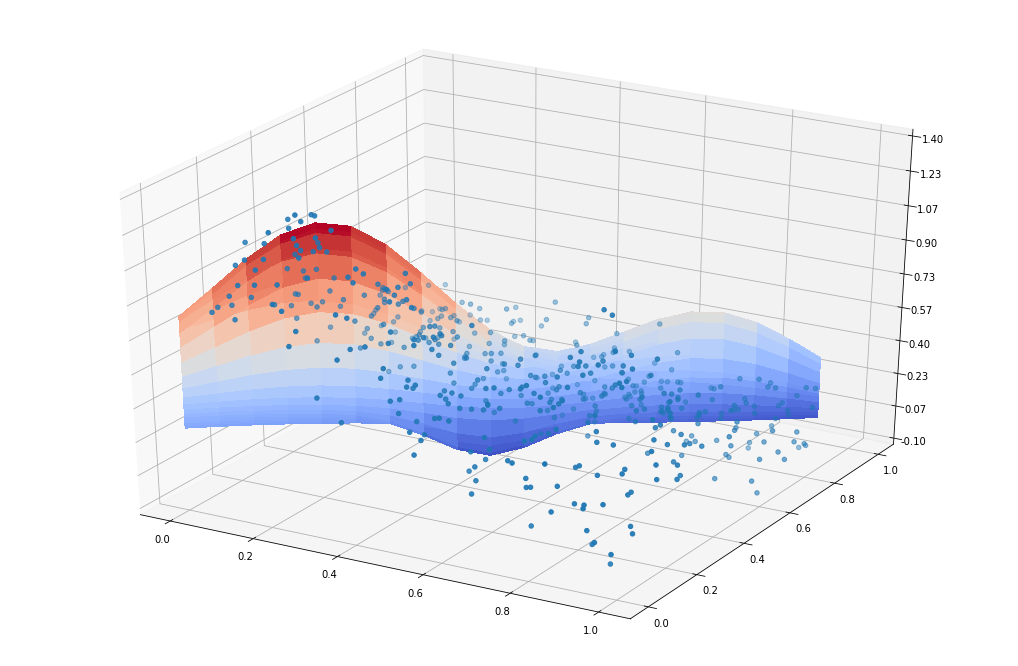

In [6]:
fig = plt.figure(figsize=(18,12))
ax = fig.gca(projection='3d')
ax.scatter(*generate_sample(500, var=10**(-2)))
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.show()